In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# arr = np.array([1,2,3,4])

# np.save("./arr.npy", arr)
# arr = np.load("./arr.npy")

In [3]:
X = np.load("../Data/KNN/Classification/X_data.npy")
y = np.load("../Data/KNN/Classification/Y_data.npy")

In [4]:
X.shape, y.shape

((500, 2), (500,))

In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
# np.random.choice([1,2,3,4,5,6], size=3, replace=False)

In [7]:
train_indexes = np.random.choice(np.arange(0, len(X)), size=int(len(X)*0.8), replace=False)
test_indexes = np.arange(0, len(X))[[i for i in range(0, len(X)) if i not in train_indexes]]

In [8]:
X_train, y_train = X[train_indexes], y[train_indexes]
X_test, y_test = X[test_indexes], y[test_indexes]

In [9]:
# data => shape 500 x 3
# X = data[:, 0:2]
# y = data[:, 2]

In [10]:
features_1 = X_train[:, 0]
features_2 = X_train[:, 1]

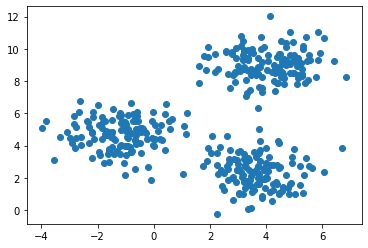

In [11]:
plt.scatter(features_1, features_2)
plt.show()

In [12]:
def get_indexes(class_no):
    indexes = []

    for i in range(len(y_train)): # range(y.shape[0])
        if(y_train[i] == class_no):
            indexes.append(i)
    
    return indexes


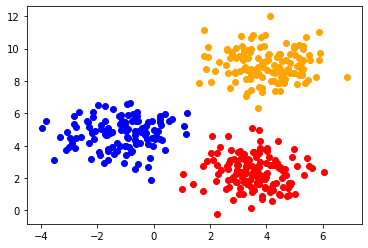

In [52]:
plt.scatter(X_train[get_indexes(0)][:, 0], X_train[get_indexes(0)][:, 1], c="red")
plt.scatter(X_train[get_indexes(1)][:, 0], X_train[get_indexes(1)][:, 1], c="orange")
plt.scatter(X_train[get_indexes(2)][:, 0], X_train[get_indexes(2)][:, 1], c="blue")
plt.show()

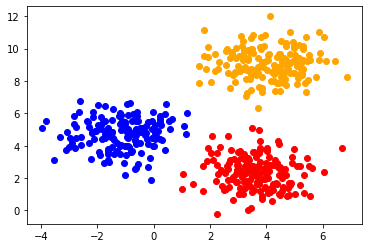

In [53]:
# indexes = (y == 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c="red")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c="orange")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], c="blue")
plt.show()

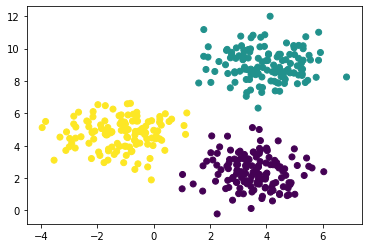

In [54]:
def get_color():
    colors = []
    for i in range(len(y_train)):
        if y_train[i] == 0:
            # colors.append("red")
            colors.append(0)
        elif y_train[i] == 1:
            # colors.append("orange")
            colors.append(1)
        else:
            # colors.append("blue")
            colors.append(2)
    return colors

plt.scatter(features_1, features_2, c=get_color())
plt.show()

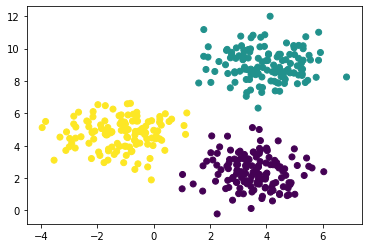

In [55]:
plt.scatter(features_1, features_2, c=y_train)
plt.show()

In [56]:
X_test.shape

(100, 2)

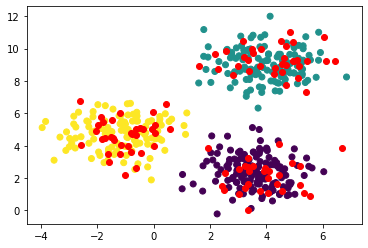

In [57]:
plt.scatter(features_1, features_2, c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c="red")
plt.show()

In [66]:
arr = [(1,3), (3, 5), (4, 3), (5, 2), (7, 3), (9, 5), (-1, 1), (-3, 13), (-3, 10)]
# arr = [1,2,3,4,5]
def func(x):
    return x[0]

sorted(arr, key=func)

[(-3, 13), (-3, 10), (-1, 1), (1, 3), (3, 5), (4, 3), (5, 2), (7, 3), (9, 5)]

In [91]:
arr = np.ones((100, 2, 3, 4))

In [92]:
np.sum(arr, axis=3).shape

(100, 2, 3)

In [59]:
def distance(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

def predict(test_point, k=5): #test_point => tuple

    distances = []
    for i in range(len(X_train)):
        p1 = (X_train[i][0], X_train[i][1]) 
        distances.append((distance(p1, test_point), i)) 
    
    def key(x):
        return x[0]

    distances = sorted(distances, key=key)

    closest_k_points = distances[:k]

    votes = {}

    for point in closest_k_points:
        index = point[1]
        if votes.get(y_train[index]) is None:
            votes[y_train[index]] = 1
        else:
            votes[y_train[index]] += 1
    
    # print("Top k votes:", votes)

    prediction = {"class": None, "votes": 0} 
    for cls, vote in votes.items():
        if vote > prediction["votes"]:
            prediction["class"] = cls
            prediction["votes"] = vote

    return prediction["class"], prediction["votes"]/k

In [60]:
cls, confidence = predict((-2, 5), 10)
print("Predicted Class:", cls, "Confidence:", confidence)

Predicted Class: 2 Confidence: 1.0


In [78]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)*100

def predict_test(X_test, y_test, X_train, y_train, k = 10):
    y_pred = []
    # def key(x):
    #     return distance[x]
    for point in X_test:
        distances = np.linalg.norm(X_train - point, ord=2, axis=1)
        # top_indexes = np.sort(np.arange(0, len(X_train)), key=key)[:k]
        top_indexes = np.argsort(distances)[:k]
        unique, count = np.unique(y_train[top_indexes], return_counts=True)
        y_pred.append(unique[np.argmax(count)])
    
    print("Testing accuracy:", accuracy(y_test, np.array(y_pred)))

    return y_pred

In [101]:
y_pred = predict_test(X_test, y_test, X_train, y_train, k=10)

Testing accuracy: 100.0


## Decision Boundary Visualisation

In [80]:
f1, f2 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

In [81]:
f1, f2= f1.flatten(), f2.flatten()

In [85]:
predictions = []
for i in range(len(f1)):
    predictions.append(predict((f1[i], f2[i]), 10)[0])

plt.scatter(f1, f2, c=predictions)
plt.show()


KeyboardInterrupt: 

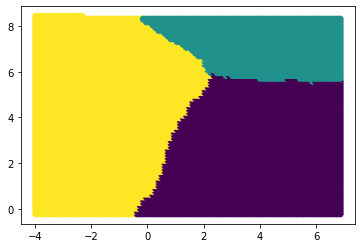

In [88]:
plt.scatter(f1[:len(predictions)], f2[:len(predictions)], c=predictions)
plt.show()

https://colab.research.google.com/drive/1nn0rebiqIakRzbDpkBs1f2ujD--gqAti#scrollTo=QYZGmccsKCWK

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)

In [23]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

In [24]:
knn.predict_proba(X_test[:10])

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])